### **0. Set-up**

In [21]:
# Import libraries and utils
%run '../../../utils.ipynb'

In [22]:
# Load NL predicted gpt-3.5-turbo-0125
nl_f9_1 = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/en/f9-1.csv")
nl_f9_2 = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/en/f9-2.csv")
nl_f9_3 = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/en/f9-3.csv")

# Combine dataframes
raw_gpt_pred = pd.concat([nl_f9_1, nl_f9_2, nl_f9_3], ignore_index=True)

# Load NL predicted text-embedding-3-small
raw_emb_pred = pd.read_csv("../../../../data/text-embedding-3-small/en.csv")

In [23]:
# Show results
raw_gpt_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,old,new,0.10,2.00,1.00,1.00,0.10,1.00,0.00,0.09,0.00,1.00,1.00,0.00,0.00,0.01,2.00
1,smart,intelligent,9.50,9.50,9.50,9.50,9.50,9.50,9.00,9.00,9.50,8.00,9.50,9.50,9.00,9.50,8.00
2,hard,difficult,9.50,9.00,9.50,9.50,9.00,9.00,9.00,9.50,9.50,9.00,9.50,9.50,8.50,9.50,9.00
3,happy,cheerful,9.50,9.50,9.80,9.50,9.50,9.00,9.70,9.50,9.50,9.50,9.75,9.50,9.50,9.50,9.00
4,hard,easy,2.50,1.00,1.50,1.00,1.67,2.33,1.58,0.10,1.00,1.00,1.00,1.67,0.21,0.10,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,join,acquire,3.04,1.80,2.50,2.85,0.15,1.25,0.19,0.06,1.35,0.06,0.22,2.00,2.25,3.85,2.50
995,send,attend,1.00,2.50,0.33,0.21,2.00,1.00,0.10,1.43,2.50,1.00,2.00,2.50,1.25,1.00,1.00
996,gather,attend,0.22,2.00,2.33,2.00,3.33,2.50,0.19,0.33,0.20,0.55,1.20,2.50,0.20,0.10,2.50
997,absorb,withdraw,1.61,0.16,1.67,0.20,0.20,2.14,0.29,0.22,2.14,0.00,1.85,1.50,1.00,0.10,0.01


In [24]:
# Show results
raw_emb_pred

,word1,word2,similarity_score
0,old,new,0.51
1,smart,intelligent,0.57
2,hard,difficult,0.58
3,happy,cheerful,0.60
4,hard,easy,0.45
...,...,...,...
994,join,acquire,0.32
995,send,attend,0.47
996,gather,attend,0.59
997,absorb,withdraw,0.43


### **1. Data Processing**

In [25]:
# Copy dataframe
gpt_pred = raw_gpt_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
gpt_pred['gpt_pred_sl'] = gpt_pred[similarity_cols].mean(axis=1).round(2)

# Select columns
gpt_pred = gpt_pred[['word1', 'word2', 'gpt_pred_sl']]

# Show results
gpt_pred

,word1,word2,gpt_pred_sl
0,old,new,0.62
1,smart,intelligent,9.20
2,hard,difficult,9.23
3,happy,cheerful,9.48
4,hard,easy,1.19
...,...,...,...
994,join,acquire,1.60
995,send,attend,1.32
996,gather,attend,1.34
997,absorb,withdraw,0.87


In [26]:
# Copy dataframe
emb_pred = raw_emb_pred.copy()

# Normalize cosine similarity to to 0-10 scale
emb_pred['scaled_similarity_score'] = 5 * (emb_pred['similarity_score'] + 1)

# Rename columns
emb_pred = emb_pred.rename(columns={'scaled_similarity_score': 'emb_pred_sl'})

# Select columns
emb_pred = emb_pred[['word1', 'word2', 'emb_pred_sl']]

# Show results
emb_pred

,word1,word2,emb_pred_sl
0,old,new,7.55
1,smart,intelligent,7.85
2,hard,difficult,7.90
3,happy,cheerful,8.00
4,hard,easy,7.25
...,...,...,...
994,join,acquire,6.60
995,send,attend,7.35
996,gather,attend,7.95
997,absorb,withdraw,7.15


In [27]:
# Concatenate DataFrames
conc = pd.concat([gpt_pred, emb_pred], axis=1)

# Show results
conc

,word1,word2,gpt_pred_sl,word1,word2,emb_pred_sl
0,old,new,0.62,old,new,7.55
1,smart,intelligent,9.20,smart,intelligent,7.85
2,hard,difficult,9.23,hard,difficult,7.90
3,happy,cheerful,9.48,happy,cheerful,8.00
4,hard,easy,1.19,hard,easy,7.25
...,...,...,...,...,...,...
994,join,acquire,1.60,join,acquire,6.60
995,send,attend,1.32,send,attend,7.35
996,gather,attend,1.34,gather,attend,7.95
997,absorb,withdraw,0.87,absorb,withdraw,7.15


### **2. Descriptive Statistics**

In [28]:
# Summary statistics SimLex-999
gpt_pred_sl_summary = round(gpt_pred['gpt_pred_sl'].describe(), 2)
emb_pred_sl_summary = round(emb_pred['emb_pred_sl'].describe(), 2)

# Add median SimLex-999
gpt_pred_sl_summary['median'] = round(gpt_pred['gpt_pred_sl'].median(), 2)
emb_pred_sl_summary['median'] = round(emb_pred['emb_pred_sl'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "gpt_pred_sl": gpt_pred_sl_summary,
    "emb_pred_sl": emb_pred_sl_summary,
})

# Show results
summary_df

,gpt_pred_sl,emb_pred_sl
count,999.00,999.00
mean,4.24,7.31
std,2.89,0.58
min,0.02,5.60
25%,1.65,6.90
50%,3.55,7.25
75%,7.10,7.65
max,9.66,9.15
median,3.55,7.25


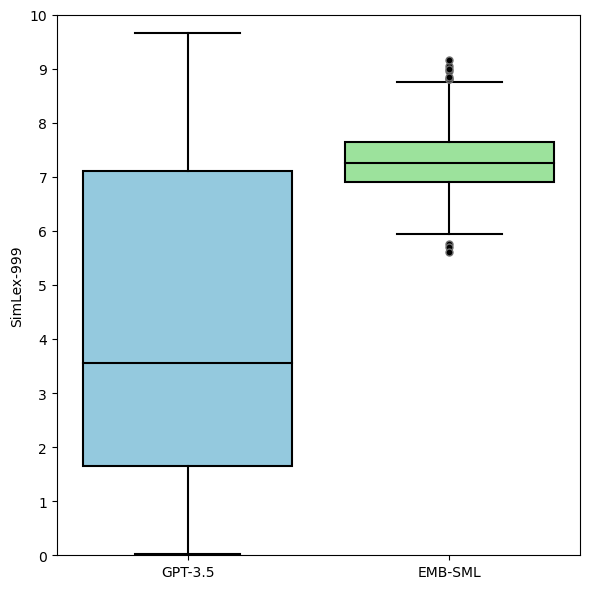

In [29]:
# Rename columns and copy
renamed_gpt_pred_sl = gpt_pred.rename(columns={"gpt_pred_sl": "SimLex-999"}).copy()
renamed_emb_pred_sl = emb_pred.rename(columns={"emb_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_gpt_pred_sl['Score'] = 'GPT-3.5'
renamed_emb_pred_sl['Score'] = 'EMB-SML'

# Combine DataFrames
combined_data = pd.concat([renamed_gpt_pred_sl, renamed_emb_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

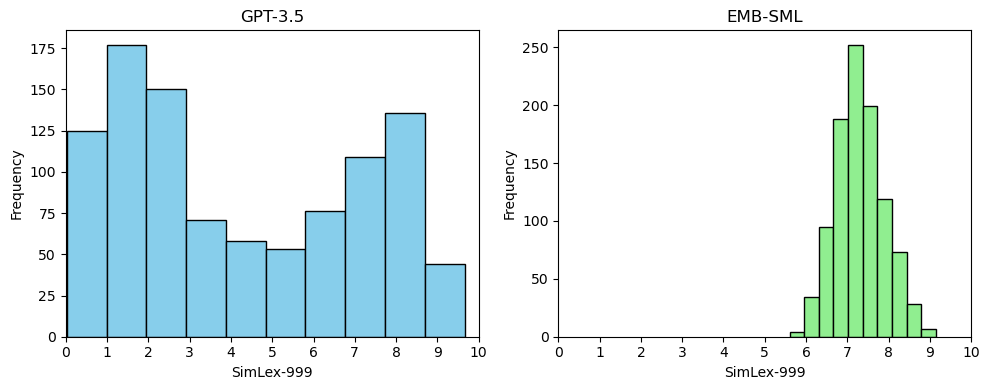

In [30]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_gpt_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('GPT-3.5')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_emb_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EMB-SML')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. GPT**

In [31]:
# Count outliers
print_outlier_counts(gpt_pred)

No outliers found in columns: gpt_pred_sl


In [32]:
# Row outliers
print_outlier_data(gpt_pred, 'gpt_pred_sl')

No outliers found in gpt_pred_sl


#### **4.2. EMB**

In [33]:
# Count outliers
print_outlier_counts(emb_pred)

Outliers in emb_pred_sl: 10


In [34]:
# Row outliers
print_outlier_data(emb_pred, 'emb_pred_sl')


Outliers in emb_pred_sl:
              word1       word2  emb_pred_sl
9             weird     strange         8.95
18            large        huge         8.80
129           movie        film         9.05
298        boundary      border         8.80
502  administration  management         8.85
723          flower   endurance         5.75
733          liquor     century         5.70
741            cent        wife         5.60
782          vanish   disappear         9.00
796         achieve  accomplish         9.15


#### **4.3. Add to Summary**

In [35]:
# Calculate outliers
outliers_gpt_pred_sl = calculate_outliers(gpt_pred, 'gpt_pred_sl')
outliers_emb_pred_sl = calculate_outliers(emb_pred, 'emb_pred_sl')

# Count outliers
count_outliers_gpt_pred_sl = outliers_gpt_pred_sl.shape[0]
count_outliers_emb_pred_sl = outliers_emb_pred_sl.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_gpt_pred_sl, count_outliers_emb_pred_sl], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,gpt_pred_sl,emb_pred_sl
count,999.00,999.00
mean,4.24,7.31
std,2.89,0.58
min,0.02,5.60
25%,1.65,6.90
50%,3.55,7.25
75%,7.10,7.65
max,9.66,9.15
median,3.55,7.25
outliers,0.00,10.00


### **5. Evaluation Metrics**

#### **5.1. Spearmans's Rank Correlation**

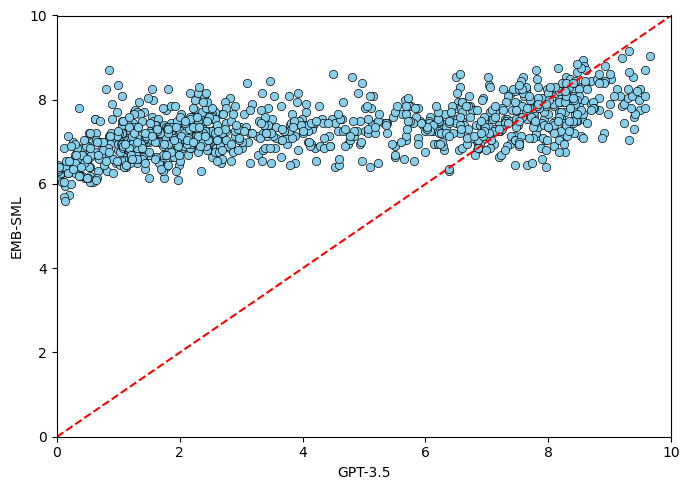

In [36]:
# Scatter plot
plot_scatter_plot(conc, 'gpt_pred_sl', 'emb_pred_sl', 'GPT-3.5', 'EMB-SML', 0, 10, 0, 10)

In [37]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'gpt_pred_sl', 'emb_pred_sl')

Spearman's Rank correlation: 0.59602
P-value: 4.091331903069488e-97
The correlation is statistically significant.



#### **5.2. Mean Square Error (MSE)**

In [38]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['gpt_pred_sl'], conc['emb_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 16.12


#### **5.3. Mean Absolute Error (MAE)**

In [39]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['gpt_pred_sl'], conc['emb_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 3.30
